In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Data

In [3]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/Job_Placement_Data.csv')

In [3]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


In [5]:
df.shape

(215, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
 df.describe(exclude=np.number).T

,count,unique,top,freq
gender,215,2,M,139
ssc_board,215,2,Central,116
hsc_board,215,2,Others,131
hsc_subject,215,3,Commerce,113
undergrad_degree,215,3,Comm&Mgmt,145
work_experience,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


In [8]:
df.isnull().mean()*100

gender                 0.0
ssc_percentage         0.0
ssc_board              0.0
hsc_percentage         0.0
hsc_board              0.0
hsc_subject            0.0
degree_percentage      0.0
undergrad_degree       0.0
work_experience        0.0
emp_test_percentage    0.0
specialisation         0.0
mba_percent            0.0
status                 0.0
dtype: float64

##### There are 0 null values here

In [9]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [10]:
# Showing object columns
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            215 non-null    object
 1   ssc_board         215 non-null    object
 2   hsc_board         215 non-null    object
 3   hsc_subject       215 non-null    object
 4   undergrad_degree  215 non-null    object
 5   work_experience   215 non-null    object
 6   specialisation    215 non-null    object
 7   status            215 non-null    object
dtypes: object(8)
memory usage: 13.6+ KB


In [11]:
# Showing float columns
df.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   hsc_percentage       215 non-null    float64
 2   degree_percentage    215 non-null    float64
 3   emp_test_percentage  215 non-null    float64
 4   mba_percent          215 non-null    float64
dtypes: float64(5)
memory usage: 8.5 KB


# EDA

In [8]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [9]:
# calculate the mean and median of different statistics in the dataset
df.groupby('status').agg(['mean', 'median'])

ssc_percentage        hsc_percentage        degree_percentage  \
                     mean median           mean median              mean   
status                                                                     
Not Placed      57.544030  56.28      58.395522  60.33         61.134179   
Placed          71.721486  72.50      69.926554  68.00         68.740541   

                  emp_test_percentage        mba_percent          
           median                mean median        mean  median  
status                                                            
Not Placed   61.0           69.587910   67.0   61.612836  60.690  
Placed       68.0           73.238041   72.0   62.579392  62.245

In [12]:
# Standard deviation
df.groupby('status').std()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
status,,,,,
Not Placed,8.394246,9.914090,6.365825,11.930687,5.705689
Placed,8.715445,9.329268,6.518087,13.729333,5.884583


## Box Plot

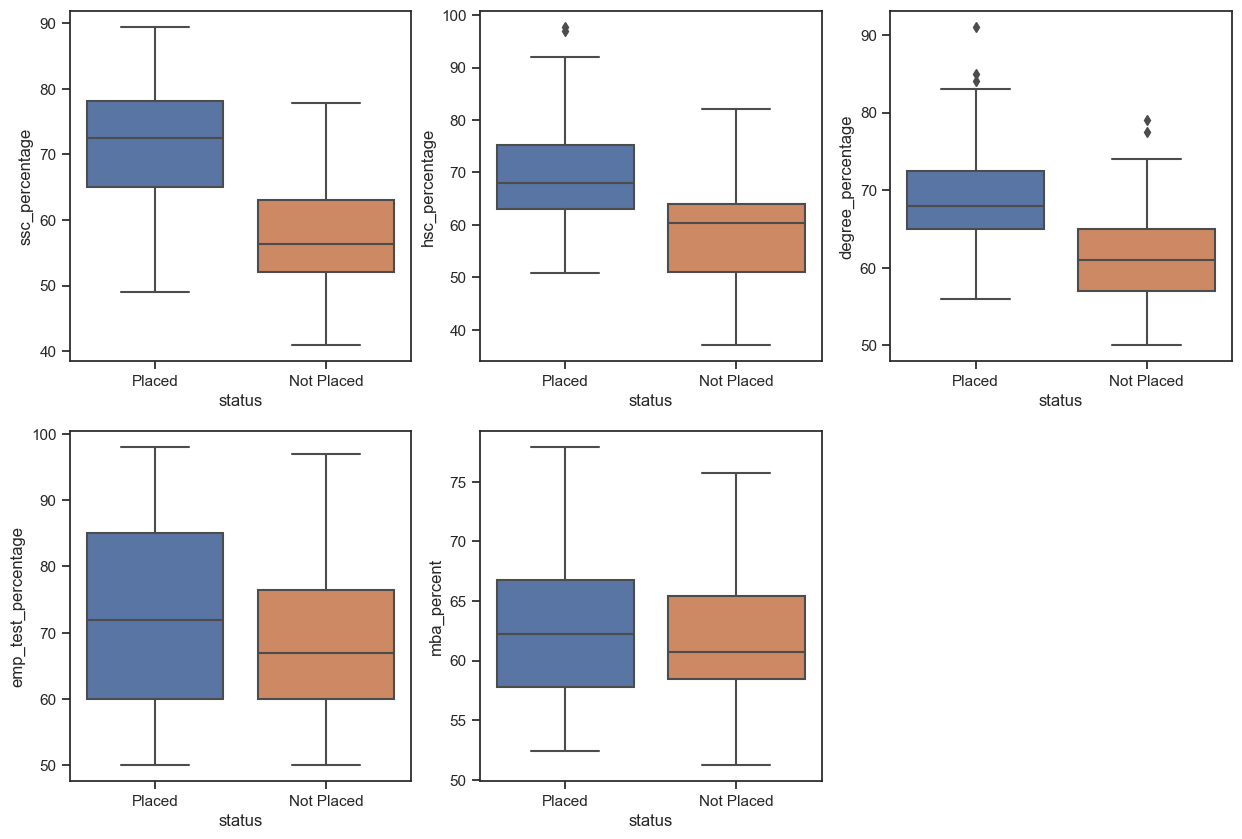

In [32]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='status', y='ssc_percentage', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='status', y='hsc_percentage', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='status', y='degree_percentage', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='status', y='emp_test_percentage', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='status', y='mba_percent', data=df)
plt.show()

## Violin Plot

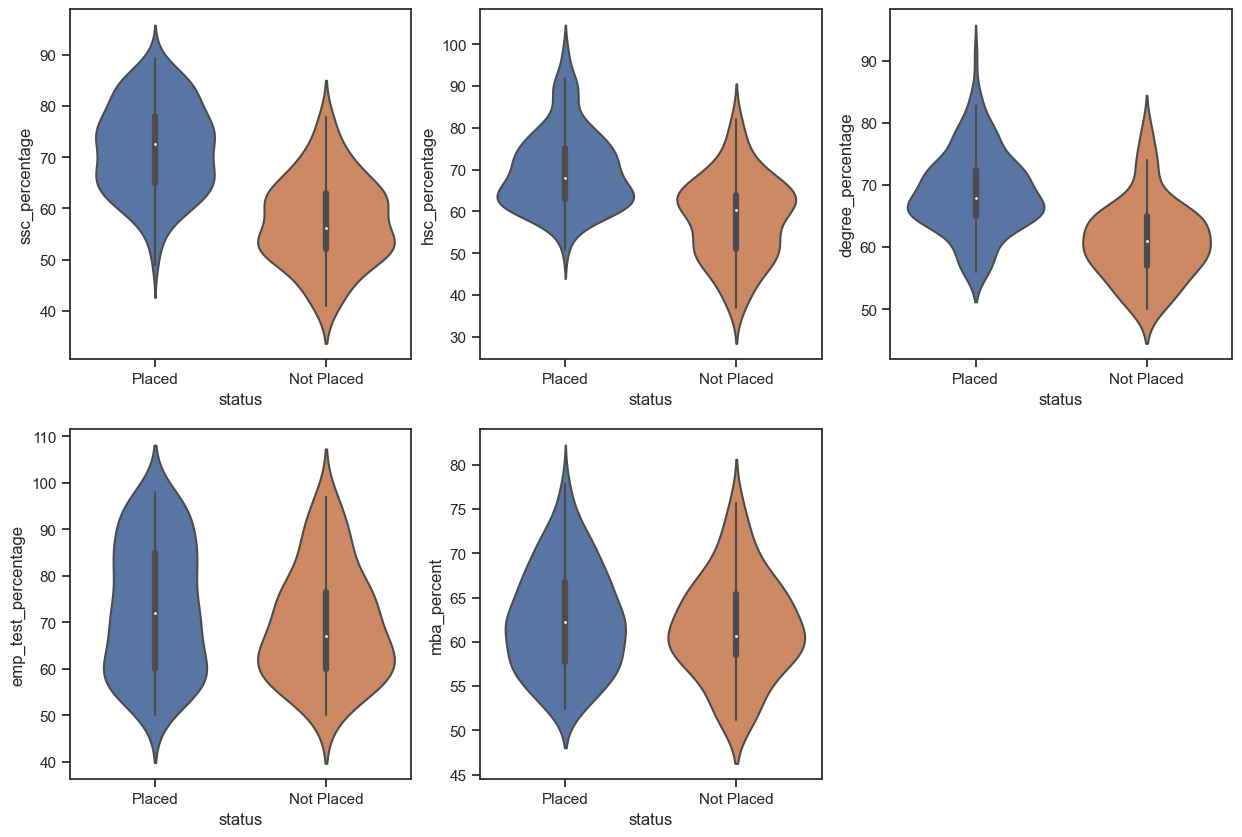

In [31]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(x='status', y='ssc_percentage', data=df)
plt.subplot(2,3,2)
sns.violinplot(x='status', y='hsc_percentage', data=df)
plt.subplot(2,3,3)
sns.violinplot(x='status', y='degree_percentage', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='status', y='emp_test_percentage', data=df)
plt.subplot(2,3,5)
sns.violinplot(x='status', y='mba_percent', data=df)
plt.show()

In [33]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


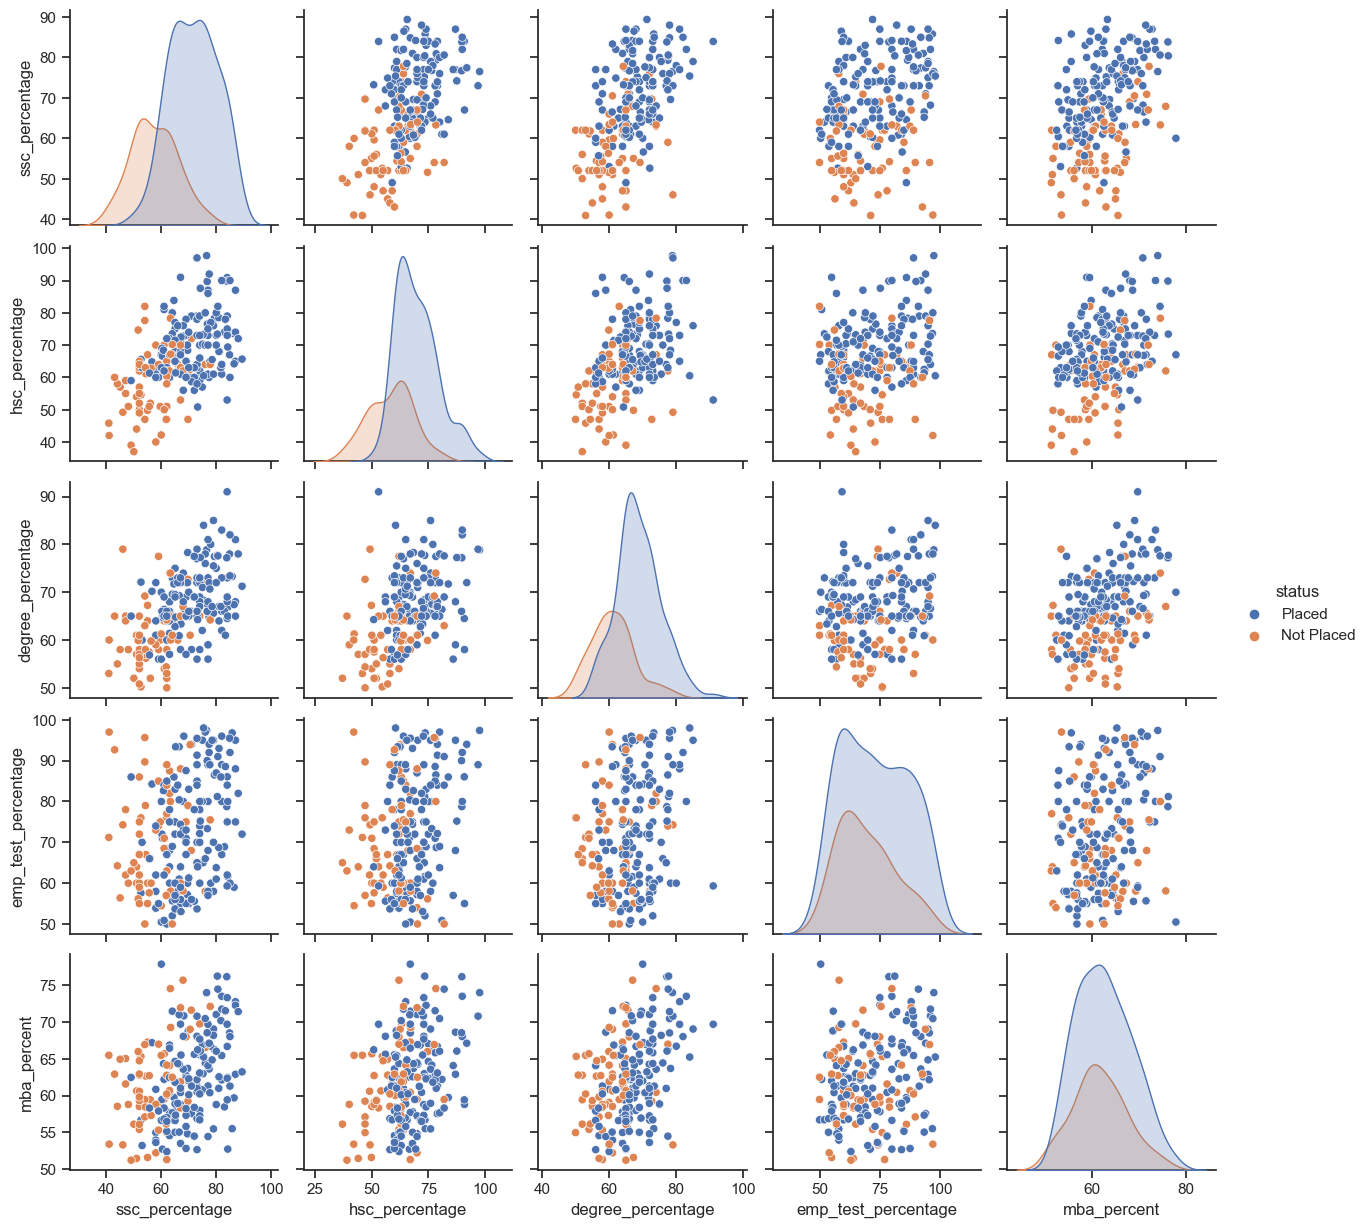

In [38]:
sns.pairplot(df, hue="status")

[]

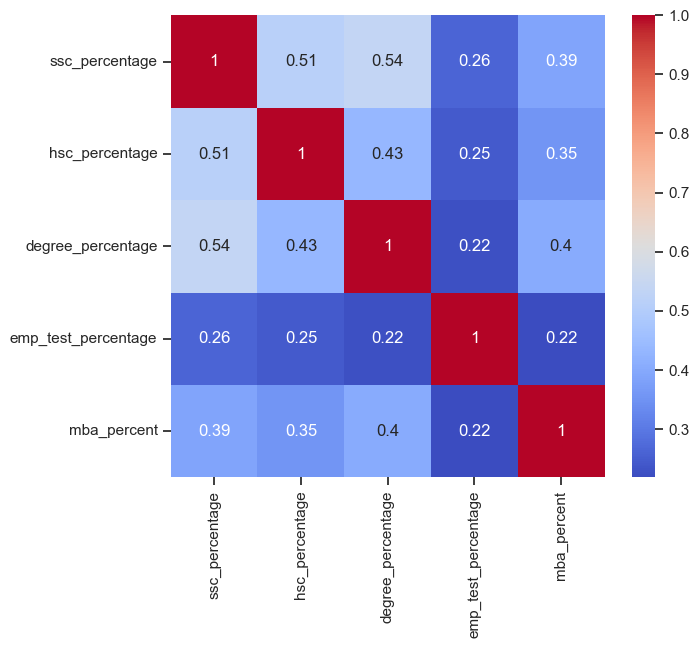

In [45]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.plot()

<AxesSubplot: title={'center': 'ssc_percentage and hsc_percentage'}, xlabel='ssc_percentage', ylabel='hsc_percentage'>

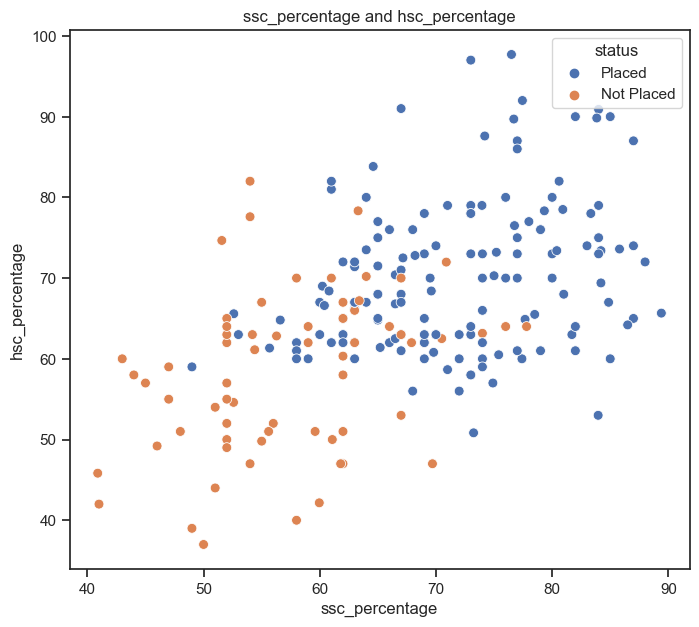

In [26]:
plt.figure(figsize=(8,7))
plt.title('ssc_percentage and hsc_percentage')
sns.scatterplot(data=df,x='ssc_percentage',y='hsc_percentage',hue='status',s=50)

(array([34., 72., 67., 32., 10.]),
 array([51.21 , 56.546, 61.882, 67.218, 72.554, 77.89 ]),
 <BarContainer object of 5 artists>)

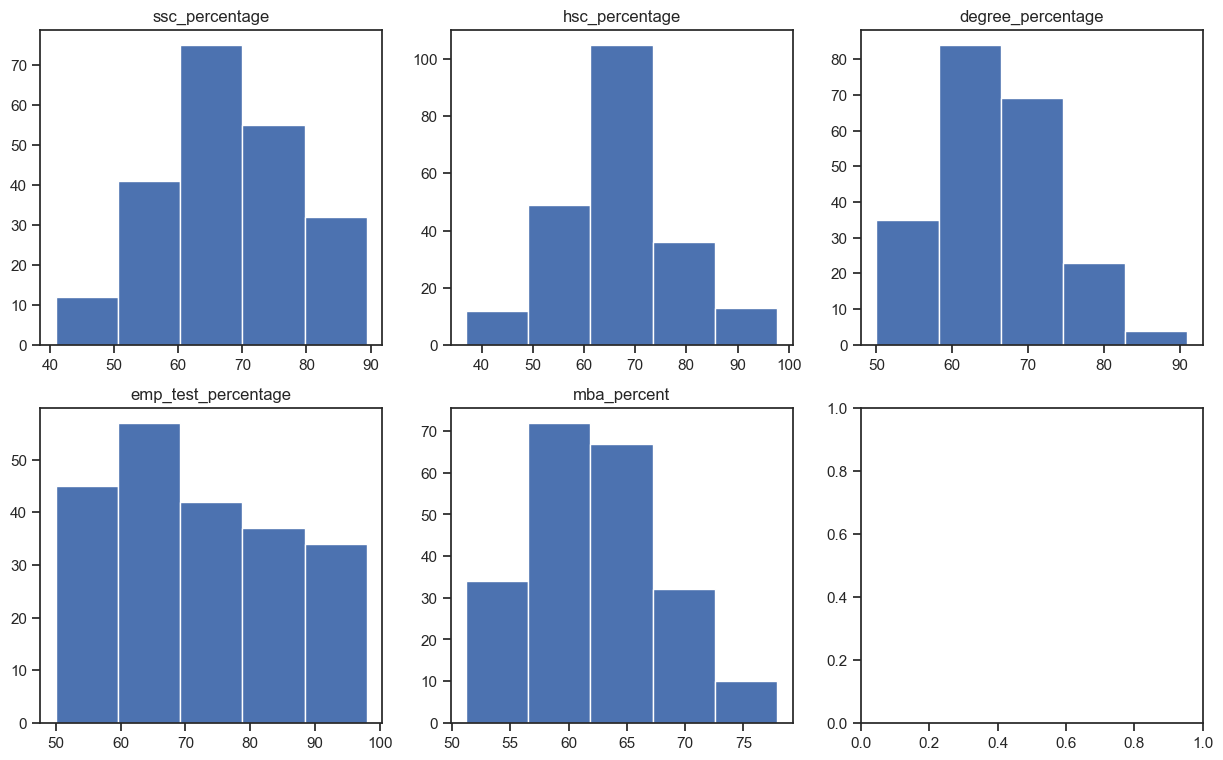

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(15,9))
axes[0,0].set_title('ssc_percentage')
axes[0,0].hist(df['ssc_percentage'], bins=5)
axes[0,1].set_title('hsc_percentage')
axes[0,1].hist(df['hsc_percentage'], bins=5)
axes[0,2].set_title('degree_percentage')
axes[0,2].hist(df['degree_percentage'], bins=5)
axes[1,0].set_title('emp_test_percentage')
axes[1,0].hist(df['emp_test_percentage'], bins=5)
axes[1,1].set_title('mba_percent')
axes[1,1].hist(df['mba_percent'], bins=5)

## Uni-Variate Analysis

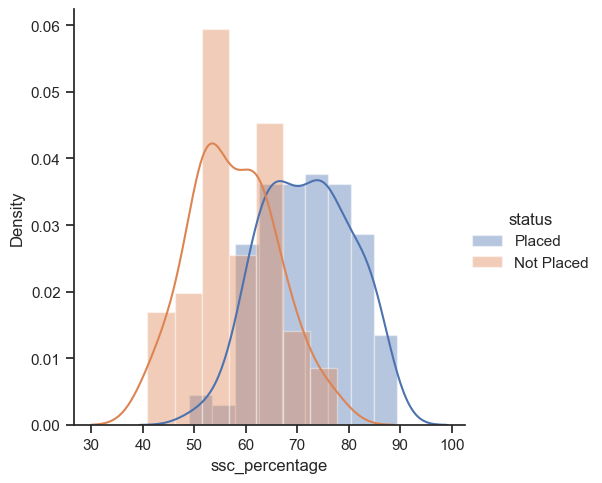

In [83]:
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot,'ssc_percentage').add_legend();

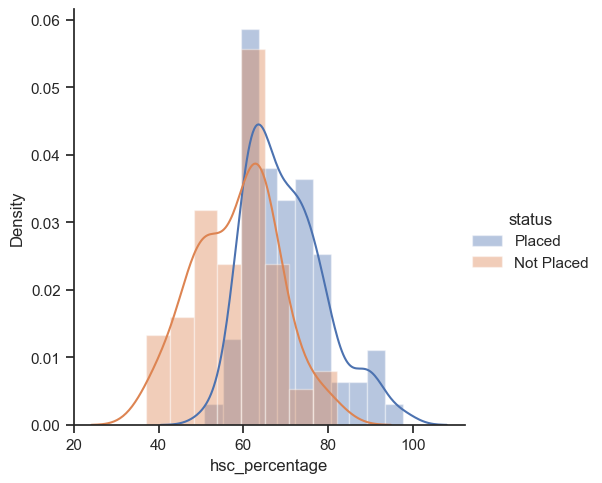

In [84]:
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot,'hsc_percentage').add_legend();

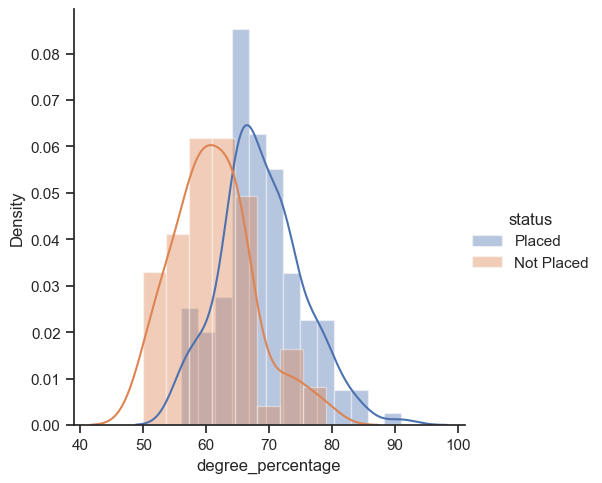

In [85]:
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot,'degree_percentage').add_legend();

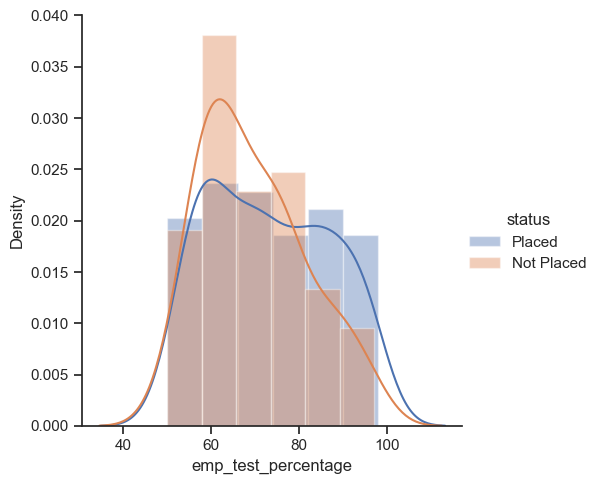

In [86]:
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot,'emp_test_percentage').add_legend();

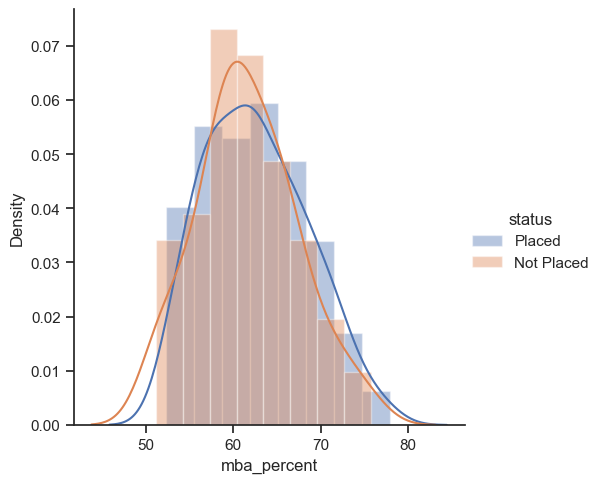

In [88]:
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot,'mba_percent').add_legend();

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [90]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [95]:
# gender
# Senior secondary exams percentage (10th Grade)
# Board of education for ssc exams
# Higher secondary exams percentage (12th Grade)
# Board of education for hsc exams
# Subject of study for hsc
# Percentage of marks in undergrad degree
# Undergrad degree majors
# Past work experience
# Aptitude test percentage
# Postgrad degree majors - (MBA specialization)
# Percentage of marks in MBA degree
# (TARGET) Status of placement. Placed / Not Placed

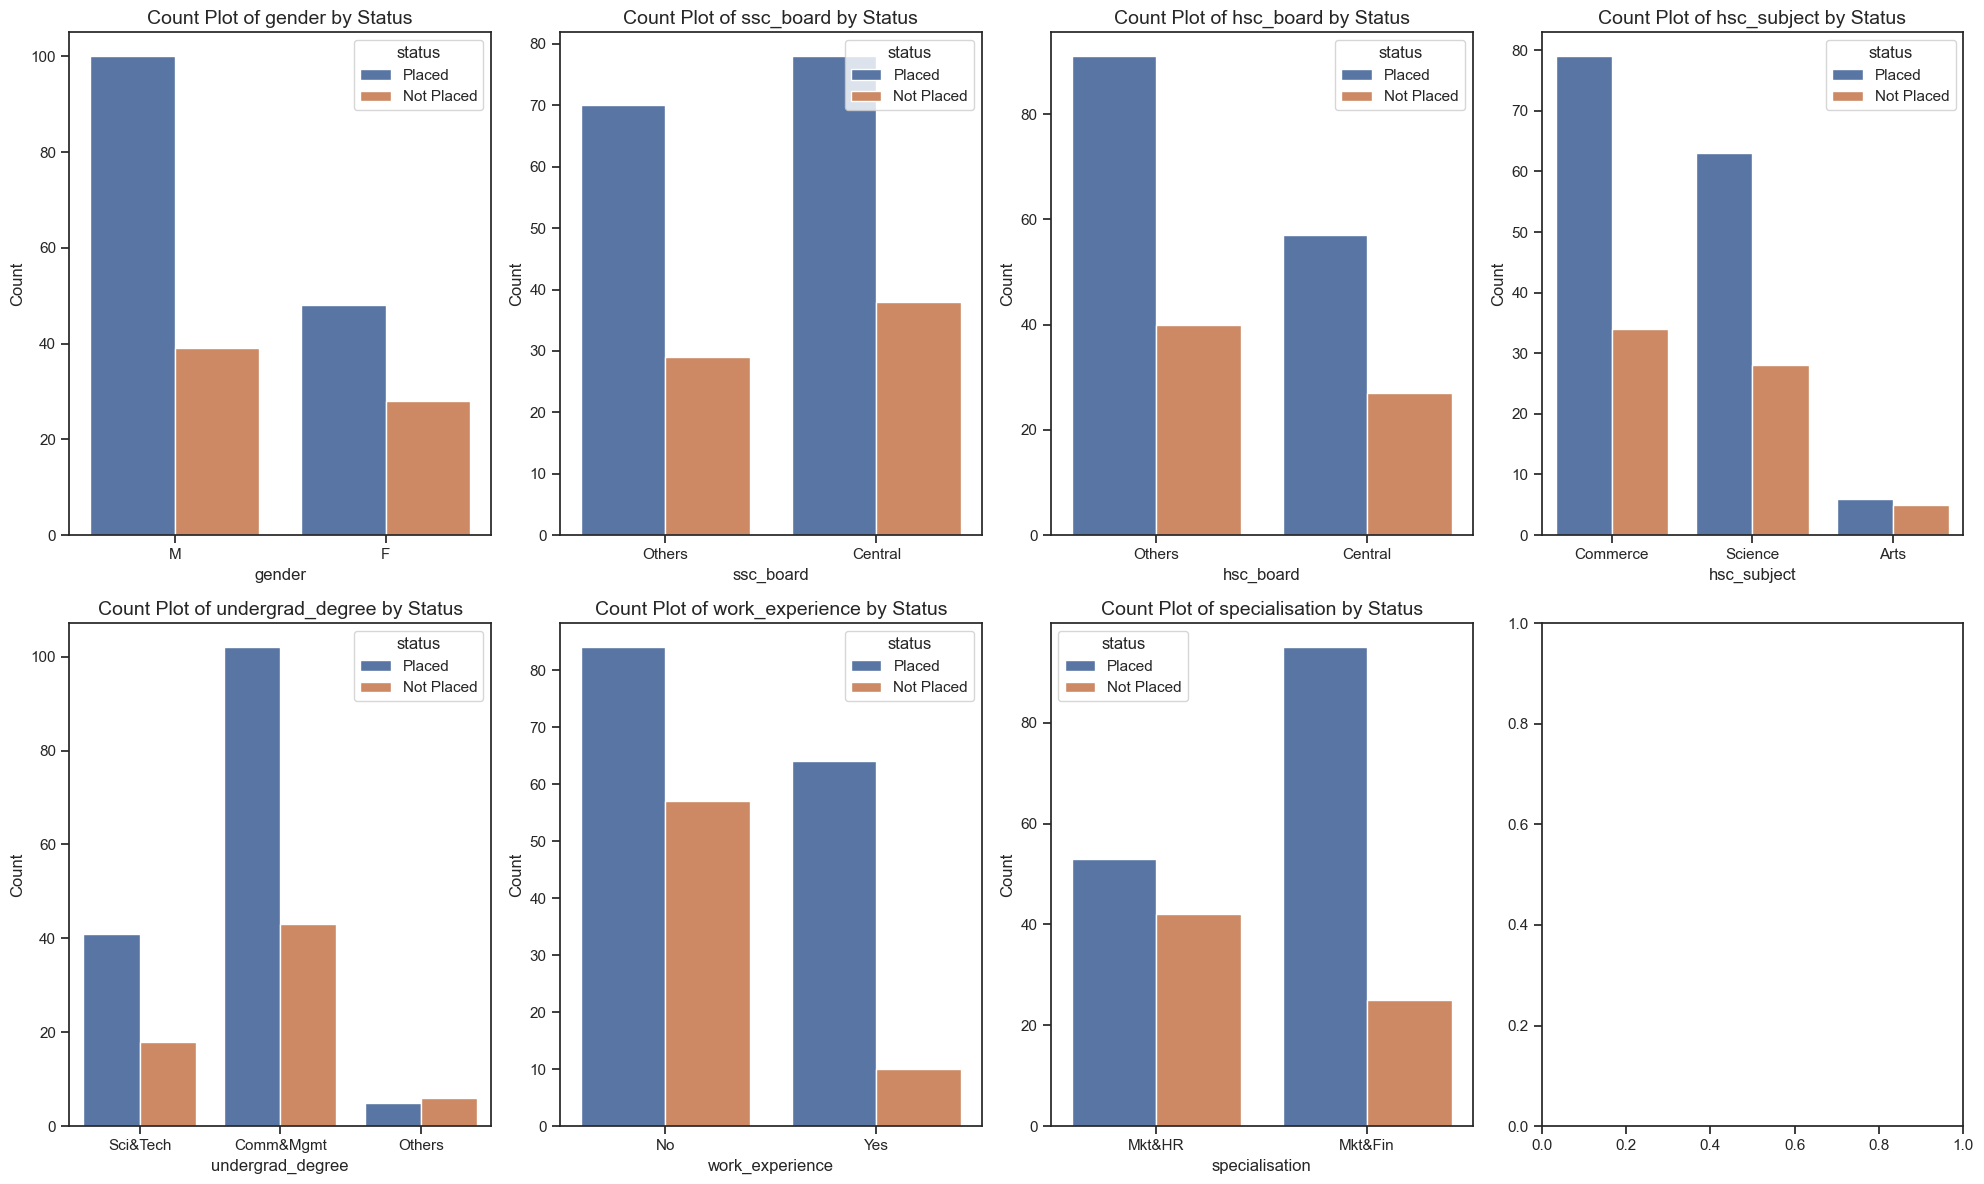

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
j = [i for i in df.columns if df[i].dtypes == 'object' and i != 'status']
for i, ax in enumerate(axes.flatten()[:len(j)]):
    sns.countplot(x=j[i], hue='status', data=df, ax=ax)
    ax.set_xlabel(j[i], fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Count Plot of {j[i]} by Status", fontsize=14)
plt.tight_layout()

In [4]:
df['ssc_board'].unique()

array(['Others', 'Central'], dtype=object)

In [5]:
df['hsc_board'].unique()

array(['Others', 'Central'], dtype=object)

In [6]:
df['hsc_subject'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [7]:
df['undergrad_degree'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [8]:
df['work_experience'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

## Turning obj to int

In [ ]:
# hard way

In [10]:
df["ssc_board"] = df["ssc_board"].map({"Central": 1, "Others": 0})

In [14]:
df["hsc_board"] = df["hsc_board"].map({"Central": 1, "Others": 0})

In [18]:
df["undergrad_degree"] = df["undergrad_degree"].map({"Sci&Tech": 1, "Comm&Mgmt": 0, "Others": 2})

In [19]:
df["hsc_subject"] = df["hsc_subject"].map({"Commerce": 1, "Science": 0, "Arts": 2})

In [20]:
df["work_experience"] = df["work_experience"].map({"Yes": 1, "No": 0})

In [21]:
df["specialisation"] = df["specialisation"].map({"Mkt&HR": 1, "Mkt&Fin": 0})

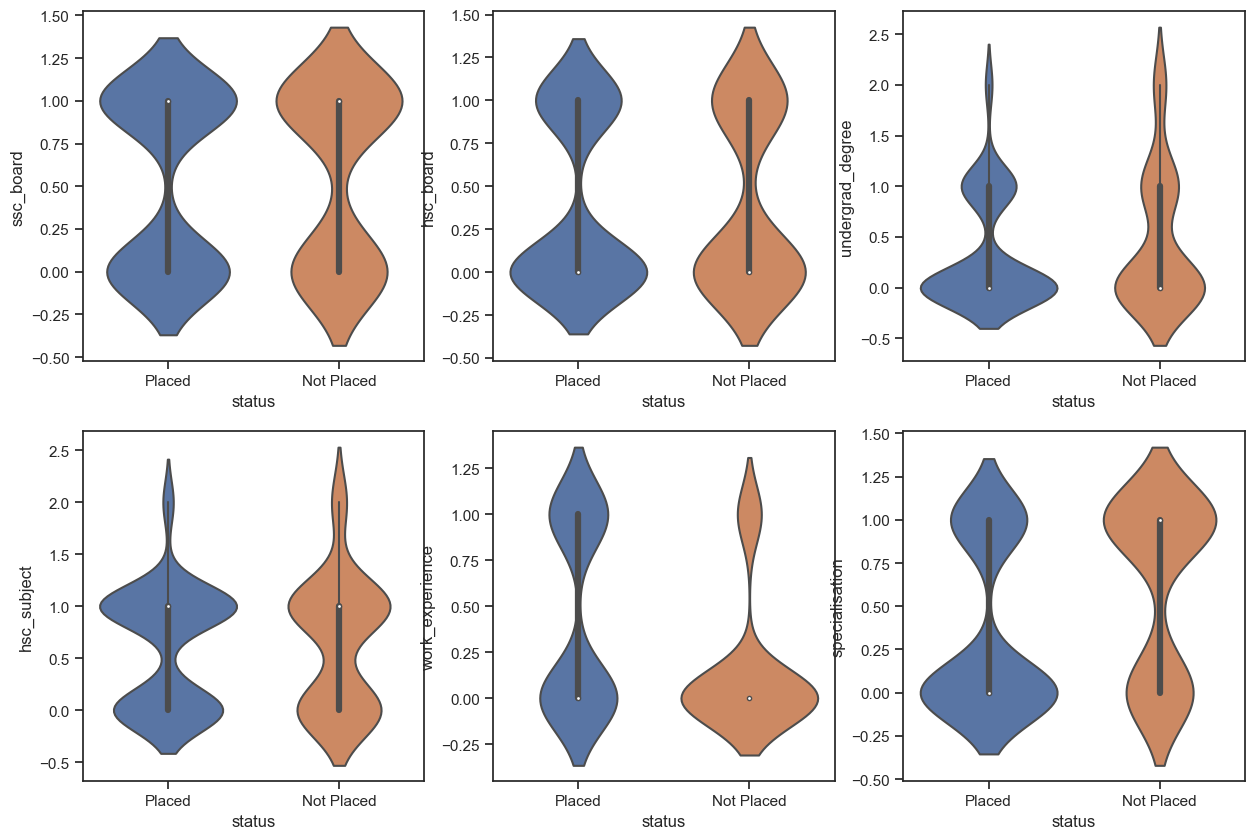

In [22]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(x='status', y='ssc_board', data=df)
plt.subplot(2,3,2)
sns.violinplot(x='status', y='hsc_board', data=df)
plt.subplot(2,3,3)
sns.violinplot(x='status', y='undergrad_degree', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='status', y='hsc_subject', data=df)
plt.subplot(2,3,5)
sns.violinplot(x='status', y='work_experience', data=df)
plt.subplot(2,3,6)
sns.violinplot(x='status', y='specialisation', data=df)
plt.show()

[]

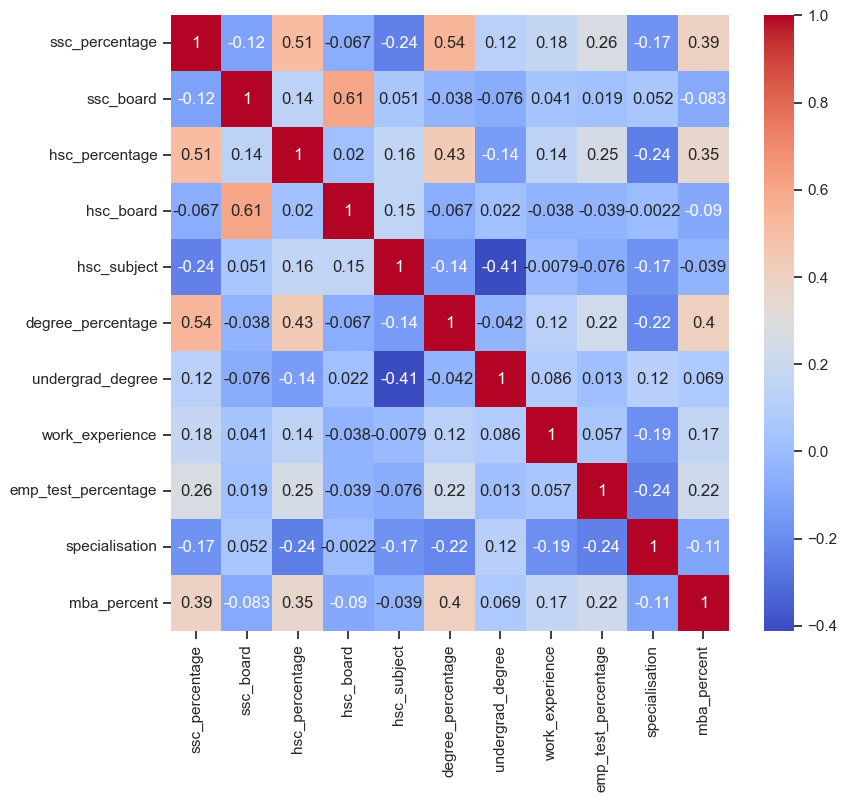

In [30]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.plot()

# Classification

### Train and Test

In [7]:
# easy way to turn objects & integers
le = LabelEncoder()
object_columns = [col for col in df.columns if df[col].dtypes == 'object']
df[object_columns] = df[object_columns].apply(le.fit_transform)

In [6]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [18]:
X = df.drop(['gender'],axis=1)
y = df.status

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## Model

### LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Fit
lr = LogisticRegression()
lr.fit(x_train,y_train)

# prediction
y_pred = lr.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [45]:
lr_score = accuracy_score(y_test,y_pred)
print(f"Score %{(lr_score*100):.2f}")

Score %97.18


In [46]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[20  1]
 [ 1 49]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.98      0.98      0.98        50

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71

